### Data Set Information

This is a small data set contains 600 customer records. The marketing department of a financial firm keeps records on customers, including demographic information and, number of type of accounts. When launching a new product, such as a "Personal Equity Plan" (PEP), a direct mail piece or a targeted email, advertising the product, is sent to existing customers, and a record kept as to whether that customer responded and bought the product. Based on this database of prior cases, the managers decide to use data mining techniques to build customer profile models in order to predict the behavior of future customers. Each record is a customer description where the "pep" field indicates whether or not that customer has purchased a PEP. For classification problems, this field is used as the target attribute (with "YES" and "NO") as class labels. The data contains the following fields:

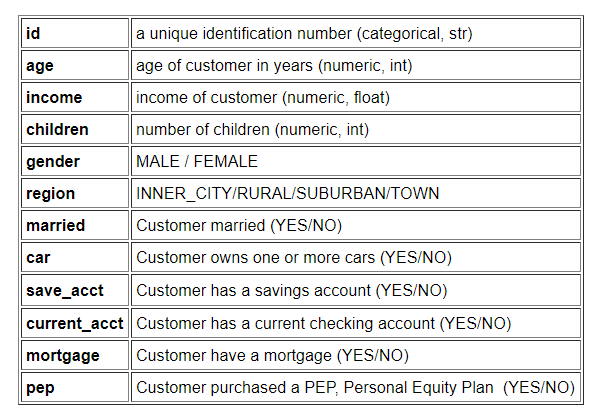

In [1]:
from IPython.display import Image
Image(filename='data exploratory NB1.png')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
table = pd.read_csv("C:/Users/Rai Chiang/Desktop/bank_data.csv",delimiter=",")

### 1.Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numerical attributes and the categorical attributes

#### The distribution associated with numerical attributes

In [48]:
dtb=table[["age","income","children"]]
dtb.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


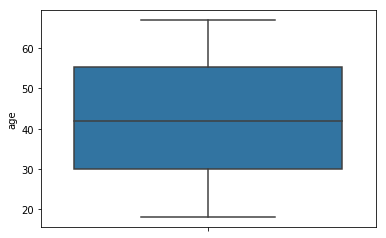

In [50]:
sns.boxplot( y=dtb["age"] )

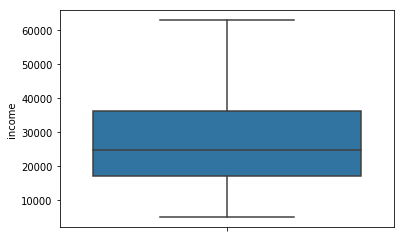

In [49]:
sns.boxplot( y=dtb["income"] )

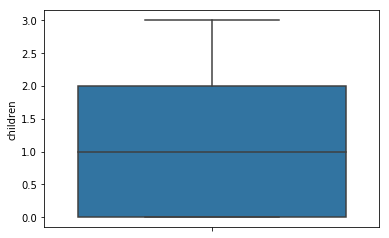

In [51]:
sns.boxplot( y=dtb["children"] )

##### The distribution associated with the categorical attributes

                       mean       std  min  25%  50%  75%  max
gender_FEMALE      0.500000  0.500417  0.0  0.0  0.5  1.0  1.0
gender_MALE        0.500000  0.500417  0.0  0.0  0.5  1.0  1.0
region_INNER_CITY  0.448333  0.497738  0.0  0.0  0.0  1.0  1.0
region_RURAL       0.160000  0.366912  0.0  0.0  0.0  0.0  1.0
region_SUBURBAN    0.103333  0.304648  0.0  0.0  0.0  0.0  1.0
region_TOWN        0.288333  0.453365  0.0  0.0  0.0  1.0  1.0
married_NO         0.340000  0.474104  0.0  0.0  0.0  1.0  1.0
married_YES        0.660000  0.474104  0.0  0.0  1.0  1.0  1.0
car_NO             0.506667  0.500373  0.0  0.0  1.0  1.0  1.0
car_YES            0.493333  0.500373  0.0  0.0  0.0  1.0  1.0
savings_acct_NO    0.310000  0.462879  0.0  0.0  0.0  1.0  1.0
savings_acct_YES   0.690000  0.462879  0.0  0.0  1.0  1.0  1.0
current_acct_NO    0.241667  0.428451  0.0  0.0  0.0  0.0  1.0
current_acct_YES   0.758333  0.428451  0.0  1.0  1.0  1.0  1.0
mortgage_NO        0.651667  0.476840  0.0  0.0  1.0  1

(Index([u'gender_FEMALE', u'gender_MALE', u'region_INNER_CITY', u'region_RURAL',
        u'region_SUBURBAN', u'region_TOWN', u'married_NO', u'married_YES',
        u'car_NO', u'car_YES', u'savings_acct_NO', u'savings_acct_YES',
        u'current_acct_NO', u'current_acct_YES', u'mortgage_NO',
        u'mortgage_YES', u'pep_NO', u'pep_YES'],
       dtype='object'), <matplotlib.axes._subplots.AxesSubplot at 0x11d32748>)

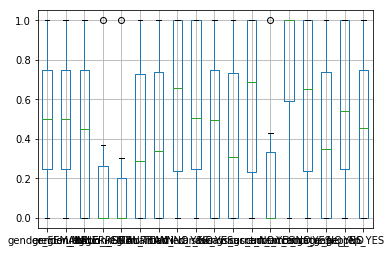

In [184]:
cattb=table[["gender","region","married","car","savings_acct","current_acct","mortgage","pep"]]
cattb=pd.get_dummies(cattb).describe()
cattb=cattb.drop(["count"],axis=0)


print cattb.T
cattb1.columns, cattb.boxplot()


### 2.Compare and contrast the subsets of customers who buy and don't buy the PEP(Personal Equity Plan)

customers who buy the PEP => original
              age        income    children
count  274.000000    274.000000  274.000000
mean    45.127737  30644.919453    0.945255
std     14.327991  13609.613043    0.860571
min     18.000000   7756.360000    0.000000
25%     34.000000  19639.475000    0.000000
50%     45.000000  28080.050000    1.000000
75%     58.000000  38458.350000    1.000000
max     67.000000  63130.100000    3.000000

customers who buy the PEP => normalized
              age      income    children
count  274.000000  274.000000  274.000000
mean     0.553627    0.413347    0.315085
std      0.292408    0.245777    0.286857
min      0.000000    0.000000    0.000000
25%      0.326531    0.214598    0.000000
50%      0.551020    0.367028    0.333333
75%      0.816327    0.554450    0.333333
max      1.000000    1.000000    1.000000


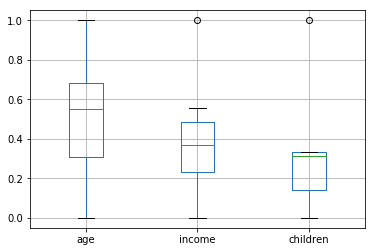

In [193]:
#customers who buy the PEP

y_tb1=table[table.pep=="YES"]
y_tb=y_tb1.drop(["id","gender","region","married","car","savings_acct","current_acct","mortgage"],axis=1)
y_tb=y_tb[["age","income","children"]]
normal_ytb=(y_tb-y_tb.min()) /(y_tb.max()-y_tb.min())
normal_ytb1=normal_ytb.describe()
normal_ytb1.drop(["count"],axis=0).boxplot()
print "customers who buy the PEP => original"
print y_tb1.describe()
print
print "customers who buy the PEP => normalized"
print normal_ytb1

customers who don't buy the PEP => original
              age        income    children
count  326.000000    326.000000  326.000000
mean    40.098160  24900.953374    1.067485
std     14.123506  11661.123422    1.195524
min     18.000000   5014.210000    0.000000
25%     27.000000  15366.475000    0.000000
50%     40.000000  23105.000000    0.000000
75%     51.000000  31210.900000    2.000000
max     67.000000  61554.600000    3.000000

customers who don't buy the PEP => normalized
              age      income    children
count  326.000000  326.000000  326.000000
mean     0.450983    0.351726    0.355828
std      0.288235    0.206244    0.398508
min      0.000000    0.000000    0.000000
25%      0.183673    0.183095    0.000000
50%      0.448980    0.319962    0.000000
75%      0.673469    0.463327    0.666667
max      1.000000    1.000000    1.000000


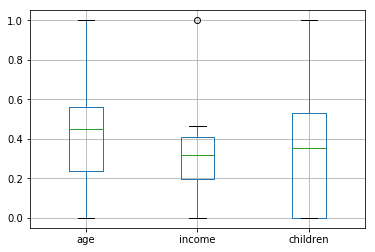

In [192]:
#customers who don't buy the PEP

n_tb1=table[table.pep =="NO"]
n_tb=n_tb1.drop(["id","gender","region","married","car","savings_acct","current_acct","mortgage"],axis=1)
n_tb=n_tb[["age","income","children"]]
normal_ntb=(n_tb-n_tb.min()) /(n_tb.max()-n_tb.min())
normal_ntb1=normal_ntb.describe()
normal_ntb1.drop(["count"],axis=0).boxplot()
print "customers who don't buy the PEP => original"
print n_tb1.describe()
print 
print "customers who don't buy the PEP => normalized"
print normal_ntb1


##### After normalized the variables and plot them as boxplots, it seems that variable children is the most significant variable among two grops. Compared with customer who buy pep, customer who don't buy pep have higher variation in the number of children they have.
---------------------------------------------------------------------------

### 3.Use z-score normalization to standardize the values of the income attribute. [Without changing the original income attribute in the table.]

In [84]:
income_min=table["income"].mean()
income_std=table["income"].std()
print "z-score normalization for income"
(table["income"]-income_min)/income_std

z-score normalization for income


0     -0.773523
1      0.198541
2     -0.848766
3     -0.554180
4      1.787071
5      0.802015
6     -1.445560
7     -0.199809
8     -0.172079
9     -0.256749
10     2.502419
11    -0.067075
12    -0.913854
13     2.145877
14    -0.624013
15    -0.401717
16    -0.759274
17     1.045932
18    -0.047663
19    -0.387708
20     2.353327
21    -0.854821
22     0.846746
23    -0.929126
24    -1.153825
25     1.047328
26    -0.520512
27    -0.574445
28     0.142259
29    -0.252253
         ...   
570    0.476102
571    0.669963
572    0.014642
573   -0.397174
574    0.073326
575    0.229774
576   -0.648378
577    1.381334
578   -1.645790
579   -0.185770
580    1.888083
581   -1.153469
582   -0.429446
583    0.121638
584   -0.309752
585   -1.395958
586   -0.710039
587    0.290692
588    1.717092
589   -1.155135
590   -0.287255
591    0.306204
592   -0.562506
593    1.852244
594    0.267280
595    1.511765
596   -1.383916
597   -0.895210
598   -0.993237
599   -0.066083
Name: income, Length: 60

### 4.Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). [Without changing the original age attribute in the table.]

In [85]:
age=pd.qcut(table["age"],3,("young","mid-age","old"))
age.head()

0    mid-age
1    mid-age
2        old
3      young
4        old
Name: age, dtype: category
Categories (3, object): [young < mid-age < old]

### 5.Use Min-Max Normalization to transform the values of all numeric attributes  (income, age, children) in the original table (before the transforamtions in parts 3 and 4 above) onto the range 0.0-1.0.

In [41]:
mTran_income=(table["income"]-table["income"].min()) / (table["income"].max()-table["income"].min())
mTran_age=(table["age"]-table["age"].min()) / (table["age"].max()-table["age"].min())
mTran_chi=(table["children"]-table["children"].min()) / (table["children"].max()-table["children"].min())
table["mTran_income"]=mTran_income
table["mTran_age"]=mTran_age 
table["mTran_chi"]=mTran_chi
stdtable=table[["mTran_income","mTran_age","mTran_chi","gender","region","married","car","savings_acct","current_acct","mortgage","pep"]]
stdtable.head()

,mTran_income,mTran_age,mTran_chi,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,0.215634,0.612245,0.333333,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,0.431395,0.448980,1.000000,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,0.198933,0.673469,0.000000,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,0.264320,0.102041,1.000000,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,0.783987,0.795918,0.000000,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


### 6.Convert the table  into the standard spreadsheet format. 
Note that this requires converting each categorical attribute into dummy attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). The numeric attributes  remains unchanged. 

In [194]:
stdtable=pd.get_dummies(stdtable)
#stdtable.to_csv("bank_numeric.csv")

### 7.Using the standardized data set perform basic correlation analysis among the attributes.  
(The Customer ID column is removed before creating the correlation matrix)

In [43]:
stdtable.corr()

,mTran_income,mTran_age,mTran_chi,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
mTran_income,1.000000,0.752726,0.036761,0.023845,-0.023845,-0.047564,0.084776,0.029824,-0.036431,0.008386,...,-0.081556,0.081556,-0.266164,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991
mTran_age,0.752726,1.000000,0.023572,0.090081,-0.090081,-0.025171,0.018635,0.031345,-0.008510,-0.010394,...,-0.077733,0.077733,-0.184389,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.173825,0.173825
mTran_chi,0.036761,0.023572,1.000000,0.014206,-0.014206,-0.051222,0.089902,-0.014122,-0.007033,0.048716,...,-0.036455,0.036455,-0.041536,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.057663,-0.057663
gender_FEMALE,0.023845,0.090081,0.014206,1.000000,-1.000000,-0.023459,-0.009092,-0.010951,0.040472,0.021110,...,0.006667,-0.006667,0.007207,-0.007207,-0.019466,0.019466,0.066465,-0.066465,0.046843,-0.046843
gender_MALE,-0.023845,-0.090081,-0.014206,-1.000000,1.000000,0.023459,0.009092,0.010951,-0.040472,-0.021110,...,-0.006667,0.006667,-0.007207,0.007207,0.019466,-0.019466,-0.066465,0.066465,-0.046843,0.046843
region_INNER_CITY,-0.047564,-0.025171,-0.051222,-0.023459,0.023459,1.000000,-0.393444,-0.306032,-0.573814,-0.003254,...,0.018143,-0.018143,0.091373,-0.091373,-0.007894,0.007894,-0.002098,0.002098,-0.001054,0.001054
region_RURAL,0.084776,0.018635,0.089902,-0.009092,0.009092,-0.393444,1.000000,-0.148158,-0.277798,0.022649,...,-0.024006,0.024006,-0.036960,0.036960,0.008496,-0.008496,0.051908,-0.051908,-0.019714,0.019714
region_SUBURBAN,0.029824,0.031345,-0.014122,-0.010951,0.010951,-0.306032,-0.148158,1.000000,-0.216080,-0.012483,...,0.061184,-0.061184,-0.002605,0.002605,-0.038157,0.038157,-0.004635,0.004635,-0.062508,0.062508
region_TOWN,-0.036431,-0.008510,-0.007033,0.040472,-0.040472,-0.573814,-0.277798,-0.216080,1.000000,-0.006369,...,-0.041604,0.041604,-0.068654,0.068654,0.027431,-0.027431,-0.036591,0.036591,0.059115,-0.059115
married_NO,0.008386,-0.010394,0.048716,0.021110,-0.021110,-0.003254,0.022649,-0.012483,-0.006369,1.000000,...,-0.009571,0.009571,0.028604,-0.028604,-0.059996,0.059996,-0.021711,0.021711,-0.189578,0.189578


##### According to the correlation analysis table above, age and income seems to have positive high correlation; gender_female and gender_male also have negative strong correlation; region_town and region_inner_city have negative mild correlation


### 8.Create a scatter plot of the (non-normalized) Income attribute relative to Age.

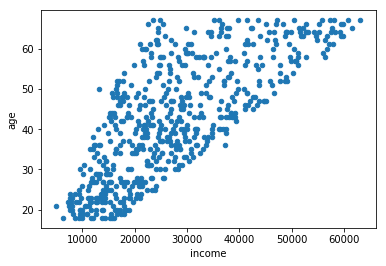

In [92]:
table.plot(x="income",y="age",kind="scatter")

##### age and income(non-standardized variable) seems to have a positive linear relationship.
-------------------------------------------------------------------------------------------------------------------

### 9.Create histograms for (non-normalized) Income (using 9 bins) and Age (using 15 bins).

                Histogram for income


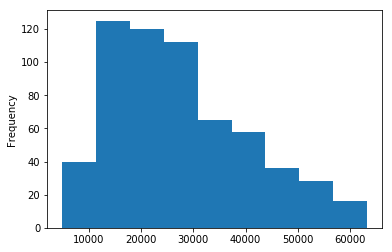

In [98]:
print"                Histogram for income"
table["income"].plot(kind="hist",bins=9)

                Histogram for age


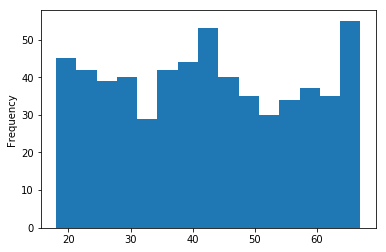

In [112]:
print"                Histogram for age"
table["age"].plot(kind="hist",bins=15)

#### 10.Using a bargraph, plot the distribution of the values of the region attribute.

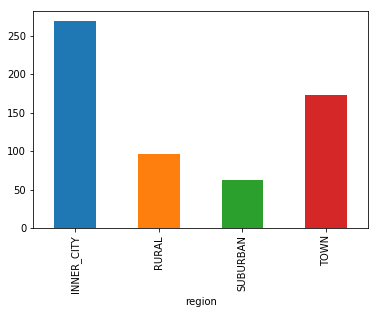

In [127]:
#first compute the frequency of each category within variable region
region_tb=table.groupby(["region"])["region"].count()
plt.show(region_tb.plot(kind="bar"))

### 11.Perform a cross-tabulation of the region attribute with the pep attribute. This requires the aggregation of the occurrences of each pep value (yes or no) separately for each value of the region attribute. 


In [105]:
gg=pd.crosstab(table["region"],table["pep"])
gg

pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


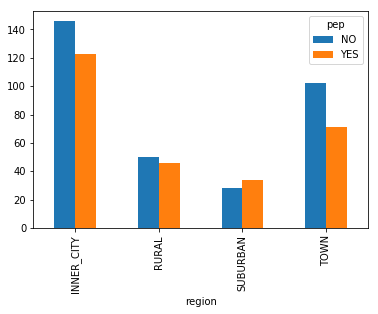

In [109]:
plt.show(gg.plot(kind="bar"))